### Importing Essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### File Path for COVID-19

In [22]:
total_confirmed_cases_file_path = r"C:\Users\dhvan\Documents\Big Data\Exam-MidTerm\covid-19\covid-19\covid_confirmed_usafacts.csv"
total_deaths_file_path = r"C:\Users\dhvan\Documents\Big Data\Exam-MidTerm\covid-19\covid-19\covid_deaths_usafacts.csv" 
population_file_path = r"C:\Users\dhvan\Documents\Big Data\Exam-MidTerm\covid-19\covid-19\covid_county_population_usafacts.csv" 

### File Path for NAMES

In [2]:
#path to the names directory in which our all names' textfiles are existed
names_dir_path = r'C:\Users\admin\Desktop\romil\names'

In [24]:
covid_confirmed_usafacts = pd.read_csv(total_confirmed_cases_file_path)
covid_deaths_usafacts = pd.read_csv(total_deaths_file_path)
covid_county_population_usafacts = pd.read_csv(population_file_path)

# Part 1: COVID-19

### Question 1: Compute the total confirmed cases per day in the country. Produce a table and a line plot.

### Let's get a peek of data

In [25]:
covid_confirmed_usafacts.head(10)

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,6,6,7,7,10,10,12,12,12,12
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,10,15,18,19,23,25,28,29,34,38
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0,0,2,3,3,4,4,4,7,7
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,5,5,5,5,5,6,9,10,10,10
6,1011,Bullock County,AL,1,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
7,1013,Butler County,AL,1,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
8,1015,Calhoun County,AL,1,0,0,0,0,0,0,...,3,3,9,9,11,12,20,21,24,38
9,1017,Chambers County,AL,1,0,0,0,0,0,0,...,17,27,36,36,45,67,81,87,90,96


In [26]:
covid_confirmed_usafacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 80 columns):
countyFIPS     3195 non-null int64
County Name    3195 non-null object
State          3195 non-null object
stateFIPS      3195 non-null int64
1/22/2020      3195 non-null int64
1/23/2020      3195 non-null int64
1/24/2020      3195 non-null int64
1/25/2020      3195 non-null int64
1/26/2020      3195 non-null int64
1/27/2020      3195 non-null int64
1/28/2020      3195 non-null int64
1/29/2020      3195 non-null int64
1/30/2020      3195 non-null int64
1/31/2020      3195 non-null int64
2/1/2020       3195 non-null int64
2/2/2020       3195 non-null int64
2/3/2020       3195 non-null int64
2/4/2020       3195 non-null int64
2/5/2020       3195 non-null int64
2/6/2020       3195 non-null int64
2/7/2020       3195 non-null int64
2/8/2020       3195 non-null int64
2/9/2020       3195 non-null int64
2/10/2020      3195 non-null int64
2/11/2020      3195 non-null int64
2/12/2020      3

### list of total confirmed cases for each day from 22nd January to 6th April.

In [27]:
cases_per_day = []
for i in range(4,len(covid_confirmed_usafacts.columns)):
    cases_per_day.append(sum(covid_confirmed_usafacts[covid_confirmed_usafacts.columns[i]]))
cases_per_day[:5]

[1, 1, 2, 2, 5]

In [28]:
### getting ready the data for the final dataframe

data = {
    'Day' : covid_confirmed_usafacts.columns[4:],
    'No_of_cases' : cases_per_day,
}

### Table of Result

In [29]:
### final dataframe

total_confirmed_cases_per_day = pd.DataFrame(data)
total_confirmed_cases_per_day['Day'] = pd.to_datetime(total_confirmed_cases_per_day['Day'])
total_confirmed_cases_per_day

,Day,No_of_cases
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5
...,...,...
71,2020-04-02,241643
72,2020-04-03,276889
73,2020-04-04,310597
74,2020-04-05,335338


### Line Plot

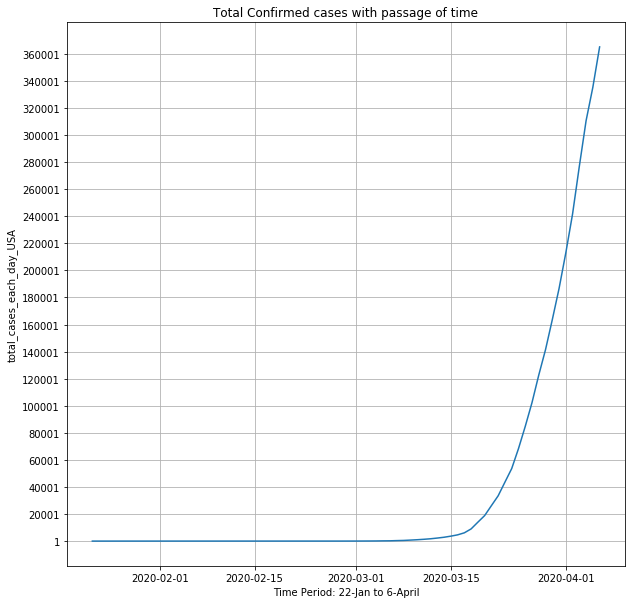

In [30]:
plt.figure(figsize = (10,10))
x = total_confirmed_cases_per_day['Day']
y = total_confirmed_cases_per_day['No_of_cases']
plt.yticks(np.arange(min(y),max(y),20000))
plt.plot(x,y)
plt.xlabel("Time Period: 22-Jan to 6-April")
plt.ylabel("total_cases_each_day_USA")
plt.title("Total Confirmed cases with passage of time")
plt.grid()
plt.show()

### Analysis
- As we can see, things started getting serious around mid-march, as the cases went up exponentially from around 3k to the straight 200k in only 15 days.

### Question 2: Compute the total confirmed cases per week in the country. Produce a table of results. Plot the results using a log line plot. That is the log of the number of cases. A log plot of an exponential process will produce a straight line. Does the resulting plot look like an exponential?

### Table of Result

In [31]:
### for each week, I took the data of every seven day.
per_week_cases = total_confirmed_cases_per_day["No_of_cases"][6::7]

### I need to take the data for 6th april explicitly as it would not be taken by the above code.  
last_day_cases = total_confirmed_cases_per_day["No_of_cases"].tail(1)
per_week_cases = per_week_cases.append(pd.Series(last_day_cases))


### I want to display the dates for both starting and ending of the week.
start_of_week = total_confirmed_cases_per_day["Day"][0::7]

end_of_week = total_confirmed_cases_per_day["Day"][6::7]
last_day = total_confirmed_cases_per_day["Day"].tail(1)
end_of_week = end_of_week.append(pd.Series(last_day))

### I also want to display the equivalent count for that week.
weeks = ['Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9','Week10','Week11']
weeks = pd.Series(weeks)

### I have to apply this step to merge and display the final dataframe correctly.
per_week_cases = per_week_cases.reset_index(drop=True)
start_of_week = start_of_week.reset_index(drop=True)
end_of_week = end_of_week.reset_index(drop=True)

### getting ready the final data for the dataframe
week_case_data = {
    "total weeks" : weeks,
    "start_of_week" : start_of_week,
    "end_of_week" : end_of_week,
    "No_of_cases" : per_week_cases,
    
}

### Final dataframe
total_confirmed_cases_per_week =  pd.DataFrame(week_case_data)
total_confirmed_cases_per_week



,total weeks,start_of_week,end_of_week,No_of_cases
0,Week1,2020-01-22,2020-01-28,5
1,Week2,2020-01-29,2020-02-04,11
2,Week3,2020-02-05,2020-02-11,12
3,Week4,2020-02-12,2020-02-18,13
4,Week5,2020-02-19,2020-02-25,15
5,Week6,2020-02-26,2020-03-03,72
6,Week7,2020-03-04,2020-03-10,997
7,Week8,2020-03-11,2020-03-17,6113
8,Week9,2020-03-18,2020-03-24,53552
9,Week10,2020-03-25,2020-03-31,186517


### Log Line Plot

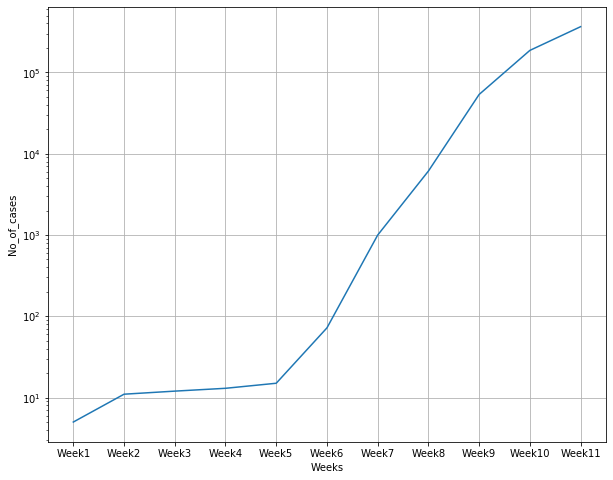

In [32]:
plt.figure(figsize=(10,8))
plt.xlabel("Weeks")
plt.ylabel("No_of_cases")
plt.grid()
plt.xticks(np.arange(11), ('Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9','Week10','Week11'))
plt.semilogy(total_confirmed_cases_per_week["No_of_cases"])

### Analysis
- Here, I have plotted the graph using log line plot. I have taken the log of 'Total No of cases' as mentioned in the question. I believe that the graph above is very similar to the straight line rather looking like an exponential graph.
- Specifically from week5 to week10, it looks really similar to the straight line

### Question 3: Compute the number of new confirmed cases per week in the the country. Produce a table of results.

In [33]:
### Created a list for the new confirmed cases per week by subtracting previous week cases from current week cases 

New_cases = []
for i in range(len(total_confirmed_cases_per_week["No_of_cases"])):
    if i == 0:
        New_cases.append(total_confirmed_cases_per_week["No_of_cases"][i])
        continue
    New_cases.append(total_confirmed_cases_per_week["No_of_cases"][i] - total_confirmed_cases_per_week["No_of_cases"][i-1])
    

In [34]:
### I only need to replace the last column of total_confirmed_cases_per_week by new list New_cases

New_confirmed_cases_per_week = total_confirmed_cases_per_week
New_confirmed_cases_per_week["No_of_cases"] = New_cases
New_confirmed_cases_per_week.columns = ['total weeks', 'start_of_week', 'end_of_week', 'New_cases_only']

In [35]:
### final dataframe

New_confirmed_cases_per_week

### Table of Results

,total weeks,start_of_week,end_of_week,New_cases_only
0,Week1,2020-01-22,2020-01-28,5
1,Week2,2020-01-29,2020-02-04,6
2,Week3,2020-02-05,2020-02-11,1
3,Week4,2020-02-12,2020-02-18,1
4,Week5,2020-02-19,2020-02-25,2
5,Week6,2020-02-26,2020-03-03,57
6,Week7,2020-03-04,2020-03-10,925
7,Week8,2020-03-11,2020-03-17,5116
8,Week9,2020-03-18,2020-03-24,47439
9,Week10,2020-03-25,2020-03-31,132965


### Question 4: Repeat #2 with the number of known deaths.

In [36]:
covid_deaths_usafacts.head()

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Let's check for the columns whether they have missing data or not

In [37]:
na = []
na = covid_deaths_usafacts.isna().sum()

In [38]:
na[70:]

3/28/2020    0
3/29/2020    0
3/30/2020    0
3/31/2020    0
4/1/2020     1
4/2/2020     1
4/3/2020     1
4/4/2020     1
4/5/2020     1
4/6/2020     1
dtype: int64

In [39]:
covid_deaths_usafacts.tail(5)

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3194,56045,Weston County,WY,56,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3195,56045,Weston County,WY,56,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


- Looks like last 6 columns contain last entry missing. So I need to drop that column otherwise it is going to create problems during summation of the whole column.

In [40]:
covid_deaths_usafacts.shape

(3196, 80)

In [41]:
covid_deaths_usafacts.dropna(inplace=True)
covid_deaths_usafacts.shape

(3195, 80)

In [42]:
### List of total deaths each day from 22nd January to 6th April

deaths_per_day = []
for i in range(4,len(covid_deaths_usafacts.columns)):
    deaths_per_day.append(sum(covid_deaths_usafacts[covid_deaths_usafacts.columns[i]]))
    

### the same thing I did here which I did in question 2. Took the data of every seven day.
    
per_week_deaths = deaths_per_day[6::7]
per_week_deaths.append(deaths_per_day[-1])



In [43]:
### I have already everything else besides per_week_deaths which I got directly from answer of question 2.

### getting ready the final data for the dataframe

week_death_data = {
    "total weeks" : weeks,
    "start_of_week" : start_of_week,
    "end_of_week" : end_of_week,
    "No_of_deaths" : per_week_deaths,
}

In [44]:
### final dataframe

total_confirmed_deaths_per_week = pd.DataFrame(week_death_data)
total_confirmed_deaths_per_week = total_confirmed_deaths_per_week.astype({'No_of_deaths':'int32'})
total_confirmed_deaths_per_week

,total weeks,start_of_week,end_of_week,No_of_deaths
0,Week1,2020-01-22,2020-01-28,0
1,Week2,2020-01-29,2020-02-04,0
2,Week3,2020-02-05,2020-02-11,0
3,Week4,2020-02-12,2020-02-18,0
4,Week5,2020-02-19,2020-02-25,0
5,Week6,2020-02-26,2020-03-03,7
6,Week7,2020-03-04,2020-03-10,31
7,Week8,2020-03-11,2020-03-17,112
8,Week9,2020-03-18,2020-03-24,737
9,Week10,2020-03-25,2020-03-31,3850


### Log Line Plot

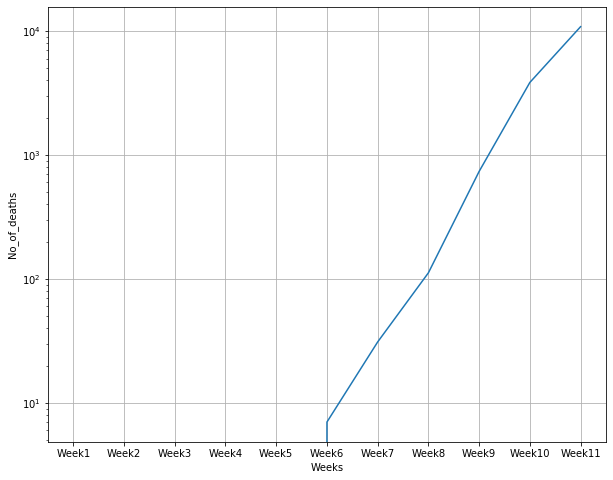

In [45]:
plt.figure(figsize=(10,8))
plt.xlabel("Weeks")
plt.ylabel("No_of_deaths")
plt.grid()
plt.xticks(np.arange(11), ('Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9','Week10','Week11'))
plt.semilogy(total_confirmed_deaths_per_week["No_of_deaths"])

###  A log plot of an exponential process will produce a straight line. Does the resulting plot look like an exponential?
- For the above graph also, We can say that the line here above is very look alike a straight line rather an exponential one.

###  Question 5: Find the 10 counties with the most known number of covid-19 cases. Plot the number of cases each week. What are the differences or similarities?

In [46]:
### As we know that the last column in covid_confirmed_usafacts file contains the total confirmed cases till 6th april for each 
### counties. So I can sort by the last columns in descending in order to get 10 counties with highest cases. 

top_10_counties = covid_confirmed_usafacts.sort_values(by=['4/6/2020'],ascending=False)[:10]
top_10_counties = top_10_counties.reset_index(drop=True)

top_10_counties

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
0,36081,Queens County,NY,36,0,0,0,0,0,0,...,9831,10737,12756,13869,15217,16819,18823,20114,21436,23133
1,36047,Kings County,NY,36,0,0,0,0,0,0,...,8129,8887,10171,11160,12274,13290,15700,17504,18558,19702
2,36059,Nassau County,NY,36,0,0,0,0,0,0,...,5537,6445,7344,8544,9554,10587,12024,13346,14398,15616
3,36005,Bronx County,NY,36,0,0,0,0,0,0,...,5752,6250,6925,7814,8607,9343,11086,12315,13368,14327
4,36119,Westchester County,NY,36,0,0,0,0,0,0,...,7875,8519,9329,9967,10683,11567,12351,13081,13723,14294
5,36103,Suffolk County,NY,36,0,0,0,0,0,0,...,4138,5023,5791,6713,7605,8746,10154,11370,12405,13487
6,36061,New York County,NY,36,0,0,0,0,0,0,...,5237,5582,6060,6539,7022,7398,8452,9300,9898,10440
7,17031,Cook County,IL,17,0,0,1,1,1,1,...,2613,3445,3727,4496,5152,5575,6473,7439,8034,8728
8,26163,Wayne County,MI,26,0,0,0,0,0,0,...,2316,2704,3195,3735,4470,5069,6096,6762,7518,8270
9,34003,Bergen County,NJ,34,0,0,0,0,0,0,...,1838,2169,2482,2909,3494,4099,4866,5760,6187,6862


In [47]:
### Here, I am taking each row from the above dataframe and taking data from every seven day. 
### Then, final output is the 10 series object appended in a list that I am going to use

final_county_week_wise = []
for i in range(len(top_10_counties)):
    county = pd.DataFrame(top_10_counties.iloc[i,4:])
    county = county.reset_index()
    county.columns = ['Day','cases']

    last_day = county["cases"].tail(1)
    county = county["cases"][6::7]
    county = county.append(pd.Series(last_day))
    county = county.reset_index(drop=True)
    
    final_county_week_wise.append(county)

In [48]:
### taking each series object and making the dataframe out of it

week = [1,2,3,4,5,6,7,8,9,10,11]
counties_week_wise_df= []
for i in final_county_week_wise:
    data = {
        "weeks" : week,
        "no_of_cases" : i
    }
    ### Final DataFrame
    counties_week_wise_df.append(pd.DataFrame(data))

In [49]:
county1 = counties_week_wise_df[0]

In [50]:
county1

,weeks,no_of_cases
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,4
7,8,248
8,9,4364
9,10,13869


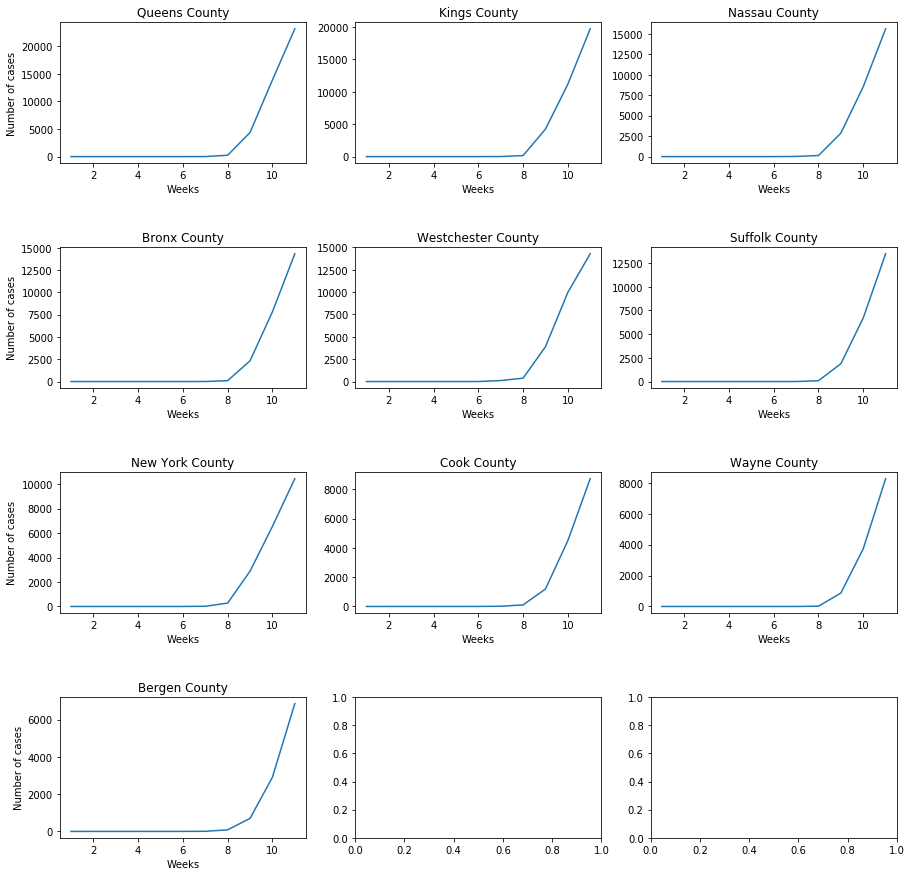

In [51]:
### Simply plot the each dataframe 

fig, axs = plt.subplots(4,3, figsize=(15, 15))
fig.subplots_adjust(hspace = 0.6, wspace=0.2)

axs = axs.ravel()

for i in range(10):
    x = counties_week_wise_df[i]["weeks"]
    y = counties_week_wise_df[i]["no_of_cases"]
    axs[i].plot(x,y)
    axs[i].set_title(top_10_counties.iloc[i,1])
    axs[i].set_xlabel("Weeks")
    if i%3 == 0:
        axs[i].set_ylabel("Number of cases")
    


### Let's talk about similaries and differences here

#### Similaries:
- Here, one common thing that I find in every county is that from week 8, things started getting serious. Cases really went up exponentially from week 8 in every county which is clearly apparent from the plots.
- Another thing that I found is from these 10 counties, I see that first top 7 counties belong to the same state NY.

### Now, from the above graph it's very hard to distiguish the differences among the counties so to find the difference, let's plot the log plot of a bar graph 

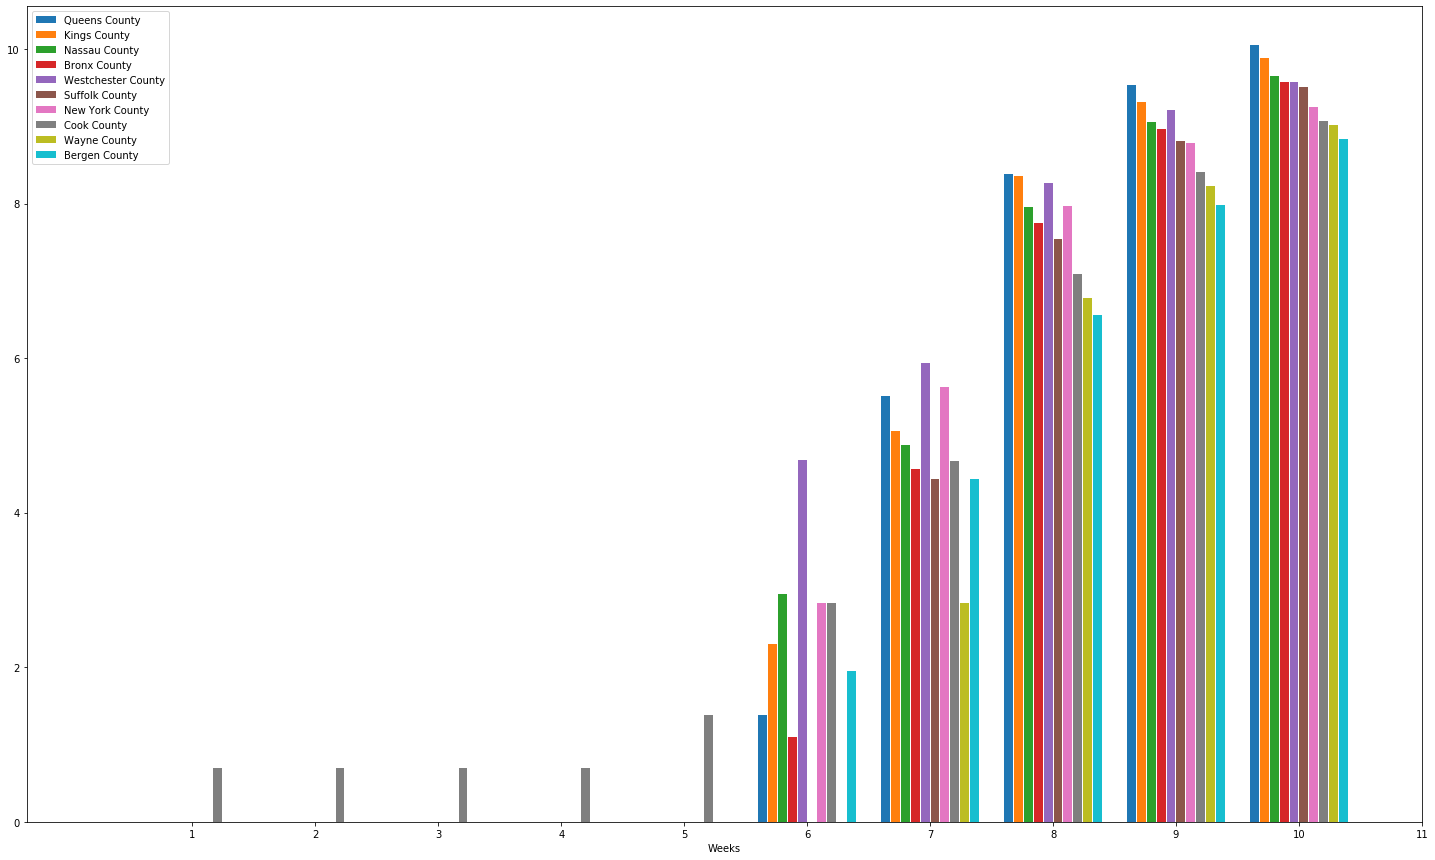

In [53]:
from matplotlib import pyplot as plt


def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, np.log(y), width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys())


if __name__ == "__main__":
    # Usage example:
    data = {
        "Queens County": counties_week_wise_df[0]["no_of_cases"],
        "Kings County": counties_week_wise_df[1]["no_of_cases"],
        "Nassau County": counties_week_wise_df[2]["no_of_cases"],
        "Bronx County": counties_week_wise_df[3]["no_of_cases"],
        "Westchester County": counties_week_wise_df[4]["no_of_cases"],
        "Suffolk County": counties_week_wise_df[5]["no_of_cases"],
        "New York County": counties_week_wise_df[6]["no_of_cases"],
        "Cook County": counties_week_wise_df[7]["no_of_cases"],
        "Wayne County": counties_week_wise_df[8]["no_of_cases"],
        "Bergen County": counties_week_wise_df[9]["no_of_cases"]
        
    }
    
    fig, ax = plt.subplots(figsize=(25,15))
    bar_plot(ax, data, total_width=.8, single_width=.9)
    plt.xlabel("Weeks")
    plt.xticks(range(1,12))
    plt.show()

### Now We can clearly identify some key differences among the counties.
- It is apparent from the graph that cases started early in "Cook County". Cases were reported till week 5 only in Cook county.
- From week 6, cases started in other counties as well  
- For week 6 and 7, there were more cases for Westchester county than any other county.
- Then, From week 8, cases were peaked in Queens and Kings County more than any other county.
- In a last couple weeks, cases in all the counties were like stair-case from Queens county down to Bergen County.

### Question 6: Compute the number of known cases per population in each county that have cases of covid-19. Produce a bar graph and table of the results for the 10 counties with the highest values and the 10 counties with the lowest values.

In [54]:
### Fetch the three required columns

county_name = covid_county_population_usafacts["County Name"]
population = covid_county_population_usafacts["population"]
total_confirmed_cases = covid_confirmed_usafacts['4/6/2020']

In [55]:
### getting ready the data for the dataframe

data = {
    "CountyName" : county_name,
    "Population" : population,
    "Total_known_cases" : total_confirmed_cases,
}

In [56]:
known_cases_per_population = pd.DataFrame(data)

In [57]:
### this is not the final dataframe, as I only want those counties that does have cases of covid-19.

known_cases_per_population

,CountyName,Population,Total_known_cases
0,Statewide Unallocated,0,0
1,Autauga County,55869,12
2,Baldwin County,223234,38
3,Barbour County,24686,3
4,Bibb County,22394,7
...,...,...,...
3190,Sweetwater County,42343,5
3191,Teton County,23464,40
3192,Uinta County,20226,3
3193,Washakie County,7805,4


In [58]:
### only counties with cases of covid-19

known_cases_per_population = known_cases_per_population[known_cases_per_population.Total_known_cases !=0]
known_cases_per_population

,CountyName,Population,Total_known_cases
1,Autauga County,55869,12
2,Baldwin County,223234,38
3,Barbour County,24686,3
4,Bibb County,22394,7
5,Blount County,57826,10
...,...,...,...
3189,Sublette County,9831,1
3190,Sweetwater County,42343,5
3191,Teton County,23464,40
3192,Uinta County,20226,3


In [59]:
### since I require the cases per population rate, I need to make sure that population column can not contain the '0' entry.

known_cases_per_population = known_cases_per_population[known_cases_per_population.Population != 0]
known_cases_per_population

,CountyName,Population,Total_known_cases
1,Autauga County,55869,12
2,Baldwin County,223234,38
3,Barbour County,24686,3
4,Bibb County,22394,7
5,Blount County,57826,10
...,...,...,...
3189,Sublette County,9831,1
3190,Sweetwater County,42343,5
3191,Teton County,23464,40
3192,Uinta County,20226,3


In [60]:
### Adding a cases per population rate column to my dataframe

known_cases_per_population['Known_cases_per_100K_residents'] = (known_cases_per_population['Total_known_cases'] * 100000 ) / known_cases_per_population['Population']

In [61]:
### 10 counties with the highest "cases per population rate" value
top_10_ratio_counties = known_cases_per_population.sort_values(by = ['Known_cases_per_100K_residents'], ascending=False).head(10).reset_index(drop=True)

### 10 counties with the lowest "cases per population rate" value
bottom_10_ratio_counties = known_cases_per_population.sort_values(by = ['Known_cases_per_100K_residents'], ascending=True).head(10).reset_index(drop=True)

In [62]:
### Table of Result

top_10_ratio_counties

,CountyName,Population,Total_known_cases,Known_cases_per_100K_residents
0,Blaine County,23021,423,1837.452761
1,Rockland County,325789,5703,1750.519508
2,Westchester County,967506,14294,1477.406858
3,Orleans Parish,390144,4565,1170.080791
4,Nassau County,1356924,15616,1150.838219
5,Queens County,2253858,23133,1026.373445
6,Bronx County,1418207,14327,1010.219242
7,Richmond County,476143,4579,961.685880
8,Suffolk County,1476601,13487,913.381475
9,Orange County,384940,3397,882.475191


In [63]:
### Table of Result

bottom_10_ratio_counties

,CountyName,Population,Total_known_cases,Known_cases_per_100K_residents
0,Henderson County,82737,1,1.208649
1,Scioto County,75314,1,1.327774
2,Aroostook County,67055,1,1.491313
3,Tehama County,65084,1,1.536476
4,Laurel County,60813,1,1.644385
5,Pike County,57876,1,1.727832
6,Anderson County,57735,1,1.732052
7,Hardin County,110958,2,1.802484
8,Tuolumne County,54478,1,1.835603
9,Le Flore County,49853,1,2.005897


### Bar graph for top 10 counties with highest rate

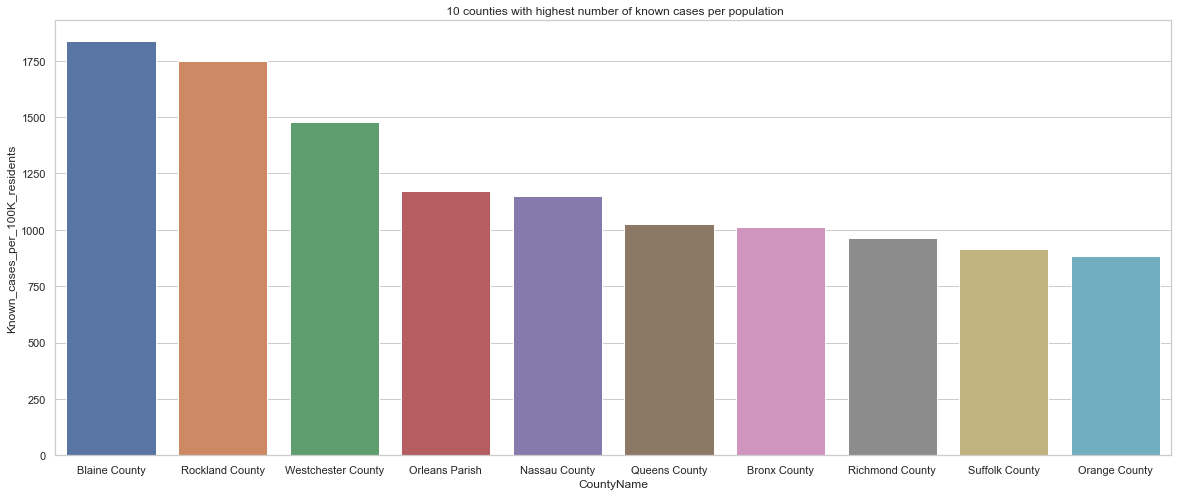

In [64]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
plt.title(" 10 counties with highest number of known cases per population")
sns.barplot(x="CountyName",y="Known_cases_per_100K_residents",data=top_10_ratio_counties)

### Bar graph for top 10 counties with lowest rate

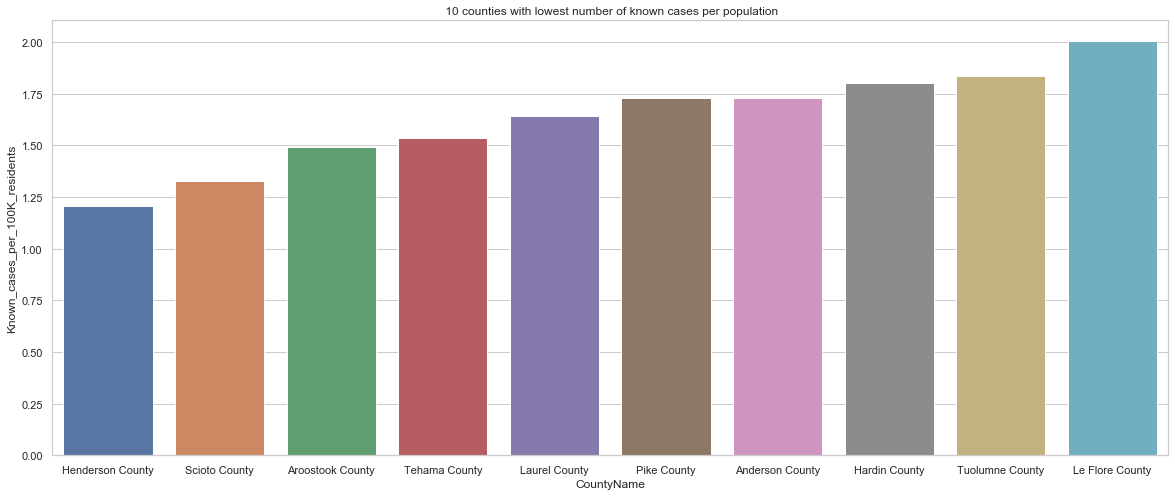

In [65]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
plt.title(" 10 counties with lowest number of known cases per population")
sns.barplot(x="CountyName",y="Known_cases_per_100K_residents",data=bottom_10_ratio_counties)

### Question 7: Compute the death rate (deaths/ known cases) in each county that have both deaths and known cases. Compute the mean and standard deviation of the results. 

In [66]:
covid_deaths_usafacts.head()

,countyFIPS,County Name,State,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,...,3/28/2020,3/29/2020,3/30/2020,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/4/2020,4/5/2020,4/6/2020
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
### As we know, the last column in covid_death_usafacts and covid_confirmed_usafacts contains the total deaths and 
### total known cases up to 6th april. So I need to take those 2 columns out.

deaths = covid_deaths_usafacts['4/6/2020']
known_cases = covid_confirmed_usafacts['4/6/2020']


In [68]:
### getting ready the data

death_rate_data = {
    "County Name" : county_name,
    "Total_Known_Cases" : known_cases,
    "Total_Deaths" : deaths,
    
    
}

In [69]:
### this is not the final dataframe as I need to keep only those counties which have both - deaths and known cases.

death_rate_df = pd.DataFrame(death_rate_data)
death_rate_df

,County Name,Total_Known_Cases,Total_Deaths
0,Statewide Unallocated,0,0.0
1,Autauga County,12,0.0
2,Baldwin County,38,0.0
3,Barbour County,3,0.0
4,Bibb County,7,0.0
...,...,...,...
3190,Sweetwater County,5,0.0
3191,Teton County,40,0.0
3192,Uinta County,3,0.0
3193,Washakie County,4,0.0


In [70]:
### taking only those counties with deaths as well as known cases data

death_rate_df = death_rate_df[death_rate_df.Total_Deaths!=0]
death_rate_df = death_rate_df[death_rate_df.Total_Known_Cases!=0]

In [71]:
death_rate_df = death_rate_df.reset_index(drop=True)

In [72]:
death_rate_df = death_rate_df.astype({'Total_Deaths':'int32'})
death_rate_df 

,County Name,Total_Known_Cases,Total_Deaths
0,Chambers County,96,5
1,Etowah County,42,2
2,Jackson County,17,1
3,Jefferson County,438,5
4,Lauderdale County,16,1
...,...,...,...
773,Sheboygan County,21,1
774,Washington County,57,3
775,Waukesha County,160,4
776,Waupaca County,2,1


In [73]:
### adding a death rate to my dataframe

death_rate_df["Death_Rate"] = death_rate_df['Total_Deaths'] / death_rate_df['Total_Known_Cases']

In [74]:
### final dataframe

death_rate_df

,County Name,Total_Known_Cases,Total_Deaths,Death_Rate
0,Chambers County,96,5,0.052083
1,Etowah County,42,2,0.047619
2,Jackson County,17,1,0.058824
3,Jefferson County,438,5,0.011416
4,Lauderdale County,16,1,0.062500
...,...,...,...,...
773,Sheboygan County,21,1,0.047619
774,Washington County,57,3,0.052632
775,Waukesha County,160,4,0.025000
776,Waupaca County,2,1,0.500000


In [75]:
print("Mean of Death Rate:", round(np.mean(death_rate_df["Death_Rate"]),5))
print("Standard deviation of Death Rate:", round(np.std(death_rate_df["Death_Rate"]),5))


Mean of Death Rate: 0.08166
Standard deviation of Death Rate: 0.13919


In [76]:
# death_rate_df['Death_Rate'].describe()

### Question 8: Produce a violin plot of the death rates found in #7

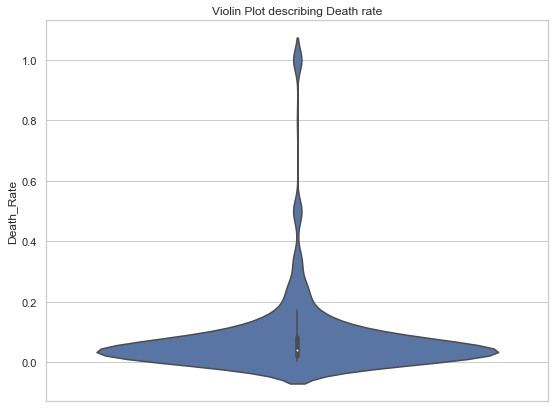

In [77]:
fig, ax = plt.subplots(figsize =(9, 7)) 
plt.title("Violin Plot describing Death rate")
sns.violinplot( ax = ax, y = death_rate_df["Death_Rate"] ) 

### Analysis 
- As we can see we have a higher density between 0.0 and 0.1
- That is very significant because Death_Rate column has mean value of 0.08166.

### Question 9: There is some hope that covid-19 may have peaked in NYC (counties Bronx, Kings, New York, Queens and Richmond). Is there any evidence of that in the data?

### Answer: 
- Yes, there indeed exists an evidence for the above question. In fact, there are a couple of evidences that we can take into consideration.

- First, The straight-forward evidence that we can consider is the answer of question 5. In that, I have plotted 10 counties with most known cases till 6th april, 2020. Of those 10 counties, top 7 counties are of NYC and almost all the counties stated in question belong to the top 10 category that have highest number of COVID-19 cases.

- Second interesting evidence is the answer of question 6. In that, I have calculated (cases per population rate) and plotted 10 counties with highest rate, in which again all these NYC counties were reported.

- Let's plot these counties with their cases

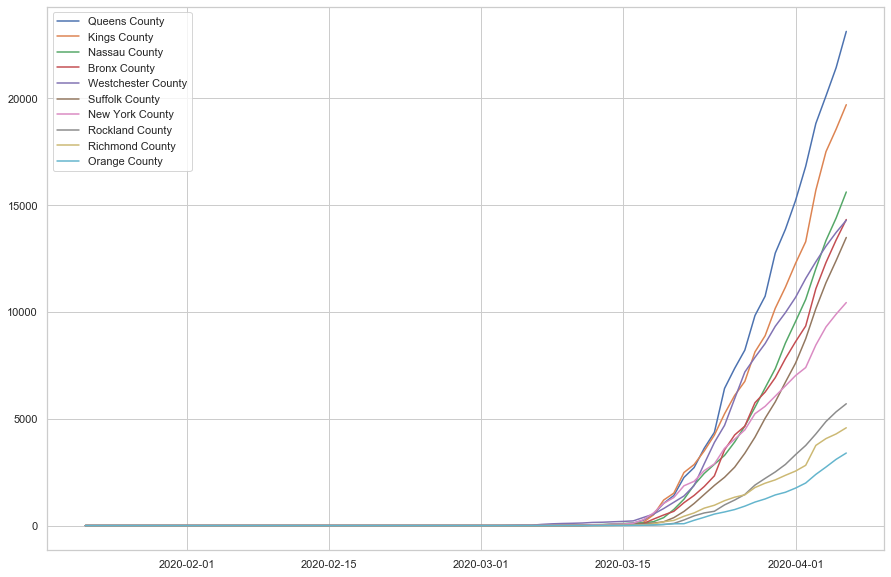

In [78]:
covid_NYC_counties = covid_confirmed_usafacts[covid_confirmed_usafacts['State'] == 'NY'].sort_values(by=['4/6/2020'],ascending=False)[:10]
# covid_NYC_counties = covid_NYC_counties[(covid_NYC_counties["County Name"] == 'Queens County') | (covid_NYC_counties["County Name"] == 'Bronx County') | (covid_NYC_counties["County Name"] == 'Kings County') | (covid_NYC_counties["County Name"] == 'New York County') | (covid_NYC_counties["County Name"] == 'Richmond County')]
plt.figure(figsize=(15,10))
for i in range(len(covid_NYC_counties)):
    dff = pd.DataFrame(covid_NYC_counties.iloc[i,4:]).reset_index()
    dff.columns = ["Day","cases"]
    dff['Day'] = pd.to_datetime(dff['Day'])
    plt.plot(dff['Day'],dff['cases'],label=covid_NYC_counties.iloc[i,1])
    plt.legend()

### Observation from graph
- Here above, I have plotted the cases for 10 NYC counties with most number of cases. 
- Upto mid-march, cases were quite low in NYC counties compared to other counties(i.e. - Westchester and cook county) which we specifically observed in differences section of question 5. But around mid march, cases started increasing exponentially in most of the NYC counties which out-numbered gradually all the other counties. 
- Hence cases indeed peaked in NYC counties


### Question 10: Seattle (King county in Washington) also hopes that they have peaked. Is there any evidence of that in the data?

#### Let's plot the King county cases and NYC counties cases together

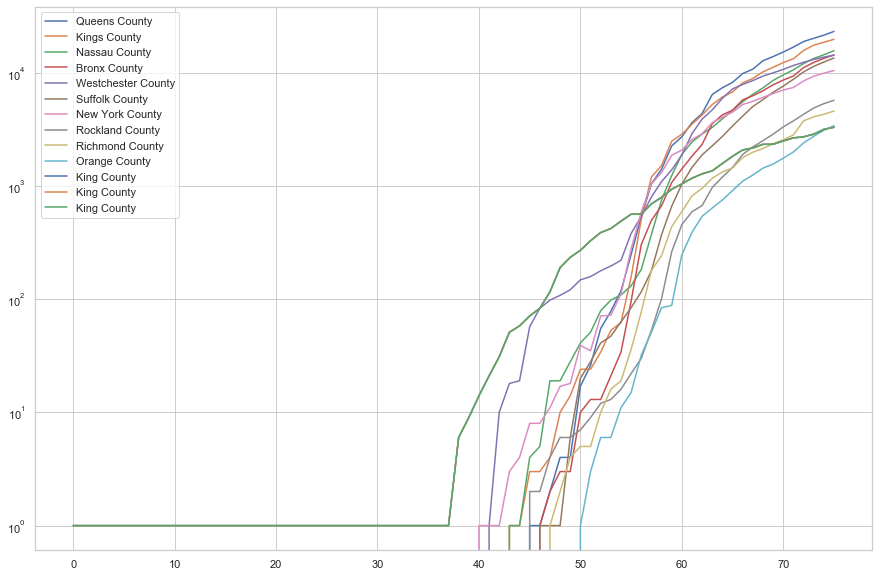

In [82]:
covid_washington_data = covid_confirmed_usafacts[(covid_confirmed_usafacts["State"] == "WA") & (covid_confirmed_usafacts["County Name"] == "King County")]
covid_NYC_counties = covid_NYC_counties.append(covid_washington_data)
# covid_washington_data = pd.DataFrame(covid_washington_data.iloc[0,4:]).reset_index()
# covid_washington_data.columns = ['Day','cases']
# covid_washington_data['Day'] = pd.to_datetime(covid_washington_data['Day'])
# covid_washington_data
plt.figure(figsize=(15,10))
for i in range(len(covid_NYC_counties)):
    dff = pd.DataFrame(covid_NYC_counties.iloc[i,4:]).reset_index()
    dff.columns = ["Day","cases"]
    dff['Day'] = pd.to_datetime(dff['Day'])
    plt.semilogy(dff['cases'],label=covid_NYC_counties.iloc[i,1])
    plt.legend()

### Observation from the above graph 

- Above, I have plotted the king county(WA) data in conjuction with NYC counties so I can easily compare king county data with NYC counties.
- As we can see, Covid-19 cases indeed peaked in King county. In fact, King county is the one where cases were started early in comparison to all NYC counties. Not only that but also cases in King county increased at almost the same rate as NYC counties which is very obvious from the graph above.


### Common evidence for question 9 and 10 -  Deaths in NYC as well as King County(WA)

Text(0.5, 0, 'Time Span: 22-Jan to 6-Apr')

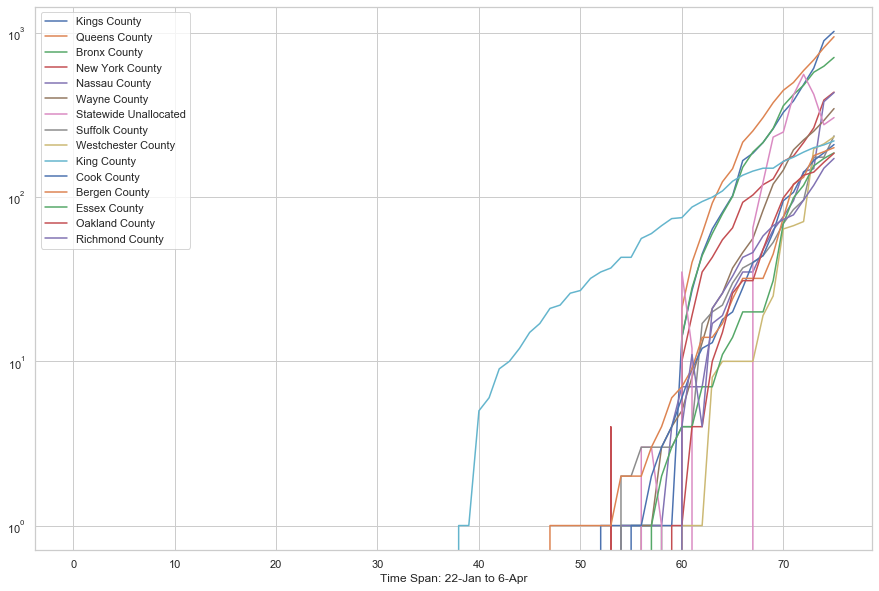

In [83]:
covid_death_NYC_WA_data = covid_deaths_usafacts.sort_values(by=['4/6/2020'],ascending=False)[:15]
plt.figure(figsize=(15,10))
# plt.xticks(np.arange(11), ('Week1','Week2','Week3','Week4','Week5','Week6','Week7','Week8','Week9','Week10','Week11'))
for i in range(len(covid_death_NYC_WA_data)):
    dff = pd.DataFrame(covid_death_NYC_WA_data.iloc[i,4:]).reset_index()
    dff.columns = ["Day","deaths"]
    dff['Day'] = pd.to_datetime(dff['Day'])
    plt.semilogy(dff['deaths'],label=covid_death_NYC_WA_data.iloc[i,1])
    plt.legend()
plt.xlabel("Time Span: 22-Jan to 6-Apr")


### Observation from the above graph

- Above I have plotted the graph of number of deaths as an evidence for King county as well as NYC counties that shows, cases indeed peaked in these regions.
- These regions have the highest number of total deaths reported in all over the country, which is clearly a big evidence that shows that up to how much extent, cases were peaked in these regions.
- We can clearly see that, deaths first started in King County of WA. Then gradually, deaths started in other NYC counties.
- So this all make sense and we can clearly consider all the facts above that I have listed in question 9 as well as 10 as a strong evidence that shows that, cases indeed peaked in these regions.

# Part 2: NAMES

### Question 1: Combine the files into one dataframe that contains year, name, sex and number of people born that year. Create a training set and a test set from this dataframe.

In [3]:
import os

files = []
#r=root, d=directories, f = files
for r, d, f in os.walk(names_dir_path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))


dataframe_list = []

### Take each text file from the files list and make dataframe and append it to dataframe_list

for f in files:
    df = pd.read_csv(f,header=None,names=["Name","Sex","Number_of_people"])
    df["year"] = f[-8:-4]
    dataframe_list.append(df)

In [4]:
# concatenate the whole list of dataframes to make into a single dataframe 
names_df = pd.concat(dataframe_list,ignore_index=True)

### Final Dataframe
names_df

,Name,Sex,Number_of_people,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


### I am going to encode two categorical columns 'Name' and 'Sex' into a numerical ones as it is required for machine learning algorithms as well as it makes the execution fast for my getSex model as well

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
names_df['Name'] = le.fit_transform(names_df['Name'])
names_df['Sex'] = le.fit_transform(names_df['Sex'])
names_df

,Name,Sex,Number_of_people,year
0,61717,0,7065,1880
1,6272,0,2604,1880
2,28345,0,2003,1880
3,27550,0,1939,1880
4,64522,0,1746,1880
...,...,...,...,...
1957041,98291,1,5,2018
1957042,98360,1,5,2018
1957043,98375,1,5,2018
1957044,98382,1,5,2018


### Creating a training and test dataset out of the final dataframe

In [6]:
# Shuffle dataset 
shuffle_names_df = names_df.sample(frac=1)

# Define a size for my train set 
train_size = int(0.7 * len(names_df))

# Split dataset 
train_set = shuffle_names_df[:train_size]
test_set = shuffle_names_df[train_size:]
print("Length of train set",train_set.shape)
print("Length of test set",test_set.shape)

Length of train set (1369932, 4)
Length of test set (587114, 4)


### Question 2: For the first model determine for each name which sex used the name most in the training data. How good is the model on the test set? How to measure good?

In [7]:
train_names = train_set['Name'].unique()
test_names = test_set['Name'].unique()
print("There are total",len(train_names),"unique names in train set")
print("There are total",len(test_names),"unique names in test set")

There are total 90991 unique names in train set
There are total 74276 unique names in test set


### A brief idea about how my model exactly works:
- it takes each name from train/test_names(a unique list of training/testing names) and groupby sex and sum all the number of people for female and male.
- so for each name I am getting, total number of count that assigned to F as well as M.
- Then, whichever sex has more number of counts, it just simply assigned that sex to that name.
- This way, the whole dictionary is created for both training and testing data.

In [8]:
### Model that will return either Male or Female based on which sex has more number of count for the given name

def getSex(dataset,name):
    name_df = dataset[dataset.Name == name]
    series = name_df.groupby(['Sex'])['Number_of_people'].sum()
    df = pd.DataFrame(series).reset_index()
    female_count = 0
    male_count = 0
    female_data = 0
    
    ### Female count ('0' for female)
    if len(df[df.Sex == 0]) != 0:
        female_count = df.iloc[0,1]
    else:
        female_data = 1 
    
    ### Male Count   ('1' for male)
    if len(df[df.Sex == 1]) !=0 and female_data == 1:
        male_count = df.iloc[0,1]
    elif len(df[df.Sex == 1]) != 0 and female_data != 1:
        male_count = df.iloc[1,1]


    if female_count > male_count:
        return 'Female'
    else:
        return 'Male'
    


- Here while running the next 2 cells when I did not encode categorical variables into numerical at first, it took almost 6 hrs for just creating the two train and test dictionaries.
- So after that I decided to encode categorical variables 'Name' and 'Sex' into numerical using Label encoder.
- And I was surprised as it just took around 10 minutes to create the exact same dictionaries
- The only difference is that I just encoded the data.. and Boom..! this encoding tremendously reduced the amount of time the cells took to excute

In [9]:
%%time

### I have created a dictionary of a name and female/male assigned to that name as a value for training data
### This dictionary answers this question : " determine for each name which sex used the name most in the training data "

###Fit the data to the model

d_train = {}
for name in train_names:
    d_train[name] = getSex(train_set,name)

Wall time: 6min 4s


In [11]:
d_train

{97498: 'Female',
 60708: 'Female',
 12895: 'Male',
 44753: 'Male',
 64929: 'Male',
 58353: 'Female',
 25477: 'Female',
 91898: 'Female',
 57356: 'Female',
 87632: 'Female',
 75083: 'Female',
 57602: 'Male',
 11613: 'Female',
 76534: 'Female',
 825: 'Female',
 7818: 'Female',
 12560: 'Male',
 49602: 'Female',
 2370: 'Female',
 9364: 'Female',
 31841: 'Female',
 57268: 'Female',
 76361: 'Male',
 67524: 'Female',
 79232: 'Male',
 3716: 'Female',
 57349: 'Male',
 2680: 'Male',
 1281: 'Female',
 47328: 'Female',
 48869: 'Female',
 64110: 'Female',
 13301: 'Female',
 21282: 'Male',
 50326: 'Male',
 66691: 'Female',
 40235: 'Female',
 12634: 'Female',
 3197: 'Male',
 11053: 'Female',
 82252: 'Female',
 965: 'Female',
 88552: 'Male',
 94009: 'Male',
 70356: 'Female',
 70243: 'Female',
 73553: 'Female',
 80187: 'Female',
 92712: 'Female',
 39388: 'Female',
 76292: 'Female',
 44744: 'Male',
 44045: 'Female',
 73864: 'Male',
 87447: 'Male',
 74801: 'Female',
 93844: 'Male',
 93838: 'Male',
 4512

In [10]:
%%time

### I have also created dictionary of a name and female/male assigned to that name as a value for testing data

### Fit the data to the model

d_test = {}
for name in test_names:
    d_test[name] = getSex(test_set,name)

Wall time: 3min 59s


In [12]:
d_test

{58485: 'Female',
 30467: 'Female',
 7952: 'Female',
 60302: 'Male',
 15092: 'Female',
 81998: 'Female',
 54570: 'Female',
 53025: 'Female',
 97415: 'Female',
 77565: 'Female',
 55537: 'Male',
 64543: 'Female',
 68494: 'Male',
 30049: 'Male',
 57261: 'Female',
 30358: 'Male',
 48166: 'Female',
 18436: 'Male',
 45313: 'Female',
 18584: 'Female',
 3912: 'Female',
 52007: 'Male',
 41984: 'Male',
 36130: 'Female',
 13463: 'Male',
 68464: 'Female',
 35465: 'Female',
 12583: 'Male',
 75209: 'Female',
 9796: 'Male',
 94794: 'Female',
 6278: 'Female',
 63526: 'Male',
 87562: 'Female',
 47123: 'Female',
 19729: 'Female',
 1772: 'Female',
 69012: 'Male',
 25832: 'Female',
 40758: 'Male',
 7871: 'Female',
 41945: 'Female',
 69270: 'Female',
 43555: 'Male',
 80060: 'Female',
 36772: 'Female',
 67633: 'Male',
 60579: 'Female',
 3868: 'Male',
 9270: 'Female',
 44727: 'Female',
 21916: 'Female',
 35228: 'Female',
 42021: 'Male',
 55108: 'Female',
 67218: 'Female',
 68360: 'Male',
 29734: 'Female',
 3

In [13]:
### Test the data on the test dataset with getSex model

wrong = 0
right = 0
Name_Not_In_TrainSet = 0
for i in d_test:
    if i in d_train:
        if d_test[i] != d_train[i]:
             wrong += 1
        else:
            right += 1
    else:
        Name_Not_In_TrainSet += 1
print(Name_Not_In_TrainSet)
print(wrong)
print(right)

7409
992
65875


In [14]:
Accuracy = right/(wrong + right)
print("Accuracy of my model is",round(Accuracy*100,4),'percent')

Accuracy of my model is 98.5165 percent


### My model is 98.51% accurate on the test set. So we can say my model is 98.51% times good on the test set.

### Some things that I want to talk about how test set prediction works:
- So, as we can see, there are total 7409 names exist that are part of only test set. These names do not exist in train set.
- Out of all the names in test set, my model classifies 65875 names correctly and 992 names incorrectly.
- Talking about accuracy, I have simply divide the right observations by right+wrong obserservation
- I wasn't sure what to do with those names that are only part of test set but not train set. So I did not take those names into consideration while calculating the accuracy of my model

### Let's talk about how to measure 'good' for a model:
- First and foremost thing, for any model, Accuracy is the main parameter with which we can decide how good our model is.
- For improving the machine learning model, we can do many things for sure such as tuning some of the hyper-parameters, normalizing the dataset, feature engineering, etc.

### Let's plot another pre-built machine learning model Logistic Regression (This is just an additional model that I want to see the results of and will compare with other two models)
- This has nothing to do with the answer of question 2, as my main answer is the model getSex which I have created.
- This logistic model is just for some extra analysis.

In [15]:
Xtrain = train_set[['Name','Number_of_people','year']]
Ytrain = train_set[['Sex']]
Xtest = test_set[['Name','Number_of_people','year']]
Ytest = test_set[['Sex']]

In [16]:
%%time

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain,Ytrain)

Wall time: 3.14 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
print("Training Accuracy of Decision Tree Model",round(lr.score(Xtrain,Ytrain) * 100,4),'percent')
print("Testing Accuracy of Decision Tree Model",round(lr.score(Xtest,Ytest) * 100,4),'percent')

Training Accuracy of Decision Tree Model 59.1151 percent
Testing Accuracy of Decision Tree Model 59.1653 percent


### Question 3:  For the second model create a decision tree using the training data. How good is the model on the test set?

In [18]:
Xtrain = train_set[['Name','Number_of_people','year']]
Ytrain = train_set[['Sex']]
Xtest = test_set[['Name','Number_of_people','year']]
Ytest = test_set[['Sex']]

In [12]:
Xtest

,Name,Number_of_people,year
1809389,90383,6,2014
1364444,21490,94,2001
620808,51795,5,1963
1467747,26922,7,2004
1108904,61089,5,1991
...,...,...,...
1293561,78097,303,1998
755938,80375,8,1973
1886446,10025,9,2016
43014,93279,638,1897


In [19]:
%%time

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(Xtrain,Ytrain)

Wall time: 5.45 s


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
Y_pred = clf.predict(Xtest)

In [20]:
print("Training Accuracy of Decision Tree Model",round(clf.score(Xtrain,Ytrain) * 100,4),'percent')
print("Testing Accuracy of Decision Tree Model",round(clf.score(Xtest,Ytest) * 100,4),'percent')

Training Accuracy of Decision Tree Model 99.8801 percent
Testing Accuracy of Decision Tree Model 93.4292 percent


### As we can see, we get the 93.43% testing accuracy, so we can say, 93.43% times our model is good on the test dataset.

### Question 4: How do the two models compare?

<b><font color='red'>Let's Compare the <u>getSex model</u> and <u>DecisionTree Model</u> that I have created above</font></b>

<b><font color='green'>getSex Model</font></b>
- <font color='green'>Accuracy of this model is 98.51%</font>
- <font color='green'>The execution time to fit the model (in this case, to create two dictionaries) is 10 mins </font>
- <font color='green'>This getSex model is simply a manual or we can say from-scratch model which behaves like a machine learning model. So it does not have any hyper-parameters </font>


<b><font color='blue'>Decision Tree Model</font></b>
- <font color='blue'>Accuracy of this model is 93.43%</font>
- <font color='blue'>The execution time to fit the model is 5.45 sec</font>
- <font color='blue'>As it's a pre-built machine learning model, it has many hyper-parameters, which can be tuned to different values to improve the test accuracy</font>

<b><font color='purple'>Logistic Regression Model (Extra)</font></b>
- <font color='purple'>Accuracy of this model is 59.17%</font>
- <font color='purple'>The execution time to fit the model is 3.14 sec</font>
- <font color='purple'>As it's also a pre-built machine learning model, so it has many hyper-parameters as well, which can be tuned to different values to improve the test accuracy</font>